## Ejemplo 3: Cluster Aglomerativo

Tareas

- Cargar los datos
- Normalización
- Dendograma
- Línea del Umbral
- AgglomerativeClustering de sklearn
- Visualización de los datos


#### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Libreria para normalización de datos
from sklearn.preprocessing import normalize
# Libreria para generar el dendograma (gráfica que parece un árbol)
import scipy.cluster.hierarchy as sch
# Libreria para agrupamiento Aglomerativo (gráfica de puntos)
from sklearn.cluster import AgglomerativeClustering

#### Cargar los datos

In [19]:
datos = pd.read_csv('data/USArrests.csv', sep=';')

datos.head(4)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5


In [11]:
data = datos.drop(['State'], axis=1)

data


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


#### Normalización de datos

In [12]:
# Se normalizan los datos
data_normalizados = normalize(data)
data_normalizados = pd.DataFrame(data_normalizados, columns=data.columns)
data_normalizados

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


#### Dendograma

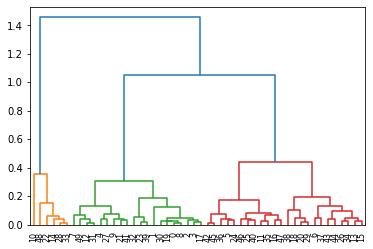

In [13]:
dendograma = sch.dendrogram(sch.linkage(data_normalizados, method='ward'))

#### Umbral

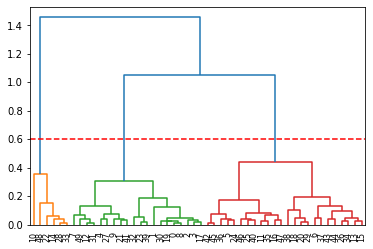

In [15]:
dendograma = sch.dendrogram(sch.linkage(data_normalizados, method='ward'))
plt.axhline(y=0.6, color='red', linestyle='--')

#### Cluster Aglomerativo (modelo de sklearn)

In [16]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')

ac.fit_predict(data_normalizados)

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2])

#### Gráfica de grupos

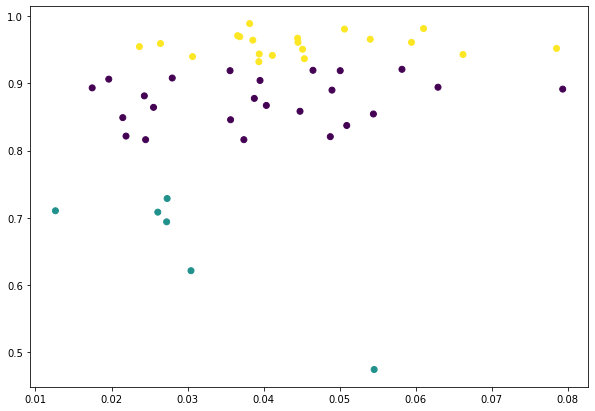

In [17]:
colores =  ac.labels_
plt.figure(figsize=(10,7))
plt.scatter(data_normalizados['Murder'], data_normalizados['Assault'], c=colores)